In [1]:
# 라이브러리 불러오기
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
# 데이터 불러오기
test = pd.read_csv('test.csv')
train = pd.read_csv("train.csv")
submission = pd.read_csv("sample_submission.csv")

# 결측치 대체 및 drop

In [3]:
# dorp, elapse 버리기
test = test.drop(["index","introelapse","testelapse","surveyelapse"], axis=1)
train = train.drop(["index","introelapse","testelapse","surveyelapse"], axis=1)

In [4]:
#  결측치 평균값으로 대체
#평균치로 조정(null값) 정수값으로 출력하기 위해  round로 반올림
train = train.fillna(round(train.mean()))
test = test.fillna(round(test.mean()))
#null값이 있는지 확인
train.isnull().sum()

/var/folders/_h/gtk6d0ts49v7qzkzs3wq6_100000gn/T/ipykernel_34095/271306489.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train = train.fillna(round(train.mean()))
/var/folders/_h/gtk6d0ts49v7qzkzs3wq6_100000gn/T/ipykernel_34095/271306489.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test = test.fillna(round(test.mean()))


Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
             ..
voted         0
married       0
familysize    0
ASD           0
nerdiness     0
Length: 66, dtype: int64

In [5]:
# "country" 문자열도 최빈값을 대체
test["country"].fillna('USA', inplace=True)
train["country"].fillna('USA', inplace=True)

In [6]:
# familysize는 평균값이 말도 안되기 때문에 최빈값으로 대체
test["familysize"].replace(2302,2, inplace=True)
train["familysize"].replace(2302,2, inplace=True)

# 판다스 이용 원핫 인코딩

In [7]:
test.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'country', 'TIPI1', 'TIPI2', 'TIPI3',
       'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1',
       'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation',
       'voted', 'married', 'familysize', 'ASD'],
      dtype='object')

In [8]:
# 테스트와 트레이닝 컬럼 항목을 맞추어야 해서 'country', 'VCL항목', age, familysize의 컬럼특성상 원핫인코딩을 진행하지 않음
# VCL 항목은 답변이 0과 1 로 구성되어 있어 안해도 될거 같아 원핫인코딩 진행하지 않음
colunms = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'TIPI1', 'TIPI2', 'TIPI3',
       'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10','education',
       'urban', 'gender', 'engnat', 'hand', 'religion', 'orientation',
       'voted', 'married', 'ASD']

In [9]:
for i in colunms :
  test = pd.get_dummies(test, columns = [i])
  train = pd.get_dummies(train, columns = [i])

In [10]:
test.columns.value_counts()

country      1
TIPI4_1.0    1
TIPI1_4.0    1
TIPI1_5.0    1
TIPI2_1.0    1
            ..
Q14_1.0      1
Q14_2.0      1
Q14_3.0      1
Q14_4.0      1
ASD_2.0      1
Length: 239, dtype: int64

In [11]:
train.columns.value_counts()

country      1
VCL1         1
TIPI1_3.0    1
TIPI1_4.0    1
TIPI1_5.0    1
            ..
Q13_5.0      1
Q14_1.0      1
Q14_2.0      1
Q14_3.0      1
ASD_2.0      1
Length: 240, dtype: int64

# 이상치 대체

In [12]:
# 100살 이상인 나이는 평균값으로 대체 해줌
for i in test["age"]:
  if i > 100 :
    i = 25

In [13]:
for i in train["age"]:
  if i > 100 :
    i = 25

# country 레이블 인코딩

In [14]:
train['country']

0        USA
1        USA
2        NLD
3        USA
4        ITA
        ... 
14995    USA
14996    USA
14997    USA
14998    USA
14999    BRA
Name: country, Length: 15000, dtype: object

In [15]:
# 테스트와 트레이닝 country unique 값이 다르기 때문에 합쳐서 진행
x = train['country']
y = test['country']
a = pd.concat([x,y]) # 데이터를 합친다
a[14990:15000]

14990    PAK
14991    USA
14992    CAN
14993    USA
14994    AUS
14995    USA
14996    USA
14997    USA
14998    USA
14999    BRA
Name: country, dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder
items = a
encoder = LabelEncoder()
encoder.fit(items)
items = encoder.transform(items)
print(items)
items.shape

[150 150 109 ... 150  25  49]


(50452,)

In [17]:
train['country'] = items[:15000]
test['country'] = items[15000:]

# 저장하기

In [18]:
# 데이터 저장하기 인코딩 잘되었나 확인 
test.to_csv('testdata16.csv', encoding='utf-8-sig', index=False)
train.to_csv('traindata16.csv', encoding='utf-8-sig', index=False)

# CNN 모델 코드

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import tensorflow as tf

In [20]:
train_x = train.drop(['nerdiness'], axis=1).astype(float)
train_y = train['nerdiness'].astype(float)
train_y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: nerdiness, dtype: float64

In [21]:
train_x.shape

(15000, 239)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(10500, 239)
(4500, 239)
(10500,)
(4500,)


In [23]:
tf.model = tf.keras.Sequential([
                               tf.keras.layers.Dense(units=256, activation='relu', input_shape=(239,)),
                               tf.keras.layers.Dense(units=256, activation='relu'),
                               tf.keras.layers.Dropout(0.2),
                               tf.keras.layers.Dense(units=256, activation='relu'),
                               tf.keras.layers.Dropout(0.2),
                               tf.keras.layers.Dense(units=256, activation='relu'),
                               tf.keras.layers.Dropout(0.2),
                               tf.keras.layers.Dense(units=256, activation='relu'),
                               tf.keras.layers.Dense(units=1, activation='sigmoid')
  ])
tf.model.summary()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               61440     
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                             

2022-08-26 17:55:10.100231: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-26 17:55:10.100374: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [24]:
# tf.model = tf.keras.Sequential([
#                                tf.keras.layers.Dense(units=32, activation='relu', input_shape=(239,)),
#                                tf.keras.layers.Dense(units=64, activation='relu'),
#                                tf.keras.layers.Dense(units=128, activation='relu'),
#                                tf.keras.layers.Dense(units=256, activation='relu'),
#                                tf.keras.layers.Dense(units=512, activation='relu'),
#                                tf.keras.layers.Dense(units=1, activation='sigmoid')
#   ])
# tf.model.summary()

In [25]:
# tf.model = tf.keras.Sequential()
# tf.model.add(tf.keras.layers.Dense(input_dim=239, units=1024, activation='leaky_relu'))
# tf.model.add(tf.keras.layers.Dense(units=1024, activation='leaky_relu'))
# tf.model.add(tf.keras.layers.Dense(units=1024, activation='leaky_relu'))
# tf.model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [26]:
# sgd=tf.keras.optimizers.SGD(lr=learning_rate) # 이외에도 adadelta, adagrad, adam, adamax, ftrl, nadam, optimizer, rmsprop, sgd가 있음
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
tf.model.compile(loss='binary_crossentropy',optimizer="adam", metrics=["accuracy"]) #원래는 sgd를 해야 하지만 임의로 수정함

In [27]:
hist = tf.model.fit(train_x, train_y, epochs=1000, batch_size=len(train_x), verbose=1, validation_data=(train_x, train_y))

Epoch 1/1000


2022-08-26 17:55:10.403632: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-26 17:55:10.771153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 874ms/step - loss: 0.8716 - accuracy: 0.5046 - val_loss: 1.5909 - val_accuracy: 0.5535
Epoch 2/1000
1/1 [==============================] - 0s 101ms/step - loss: 1.6550 - accuracy: 0.5535 - val_loss: 0.7096 - val_accuracy: 0.5571
Epoch 3/1000


2022-08-26 17:55:11.214403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 93ms/step - loss: 0.7520 - accuracy: 0.5251 - val_loss: 0.9804 - val_accuracy: 0.4465
Epoch 4/1000
1/1 [==============================] - 0s 93ms/step - loss: 1.1253 - accuracy: 0.4476 - val_loss: 0.8214 - val_accuracy: 0.4465
Epoch 5/1000
1/1 [==============================] - 0s 105ms/step - loss: 0.9279 - accuracy: 0.4494 - val_loss: 0.6884 - val_accuracy: 0.5532
Epoch 6/1000
1/1 [==============================] - 0s 188ms/step - loss: 0.7620 - accuracy: 0.4746 - val_loss: 0.6991 - val_accuracy: 0.5537
Epoch 7/1000
1/1 [==============================] - 0s 201ms/step - loss: 0.7050 - accuracy: 0.5419 - val_loss: 0.7233 - val_accuracy: 0.5536
Epoch 8/1000
1/1 [==============================] - 0s 160ms/step - loss: 0.7334 - accuracy: 0.5542 - val_loss: 0.7135 - val_accuracy: 0.5536
Epoch 9/1000
1/1 [==============================] - 0s 165ms/step - loss: 0.7340 - accuracy: 0.5517 - val_loss: 0.6929 - val_accuracy: 0.5536
Epoch 10/1000
1/1 [==

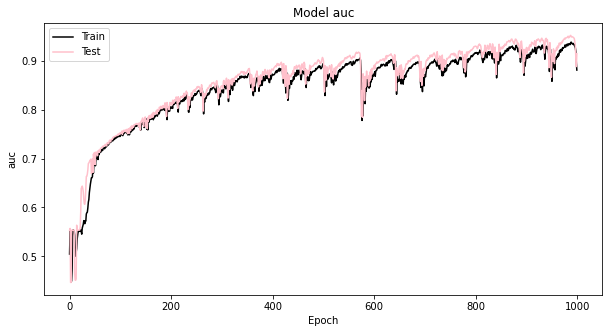

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(hist.history['accuracy'], color = "black")
plt.plot(hist.history['val_accuracy'], color ="pink")
plt.title('Model auc')
plt.xlabel('Epoch')
plt.ylabel('auc')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

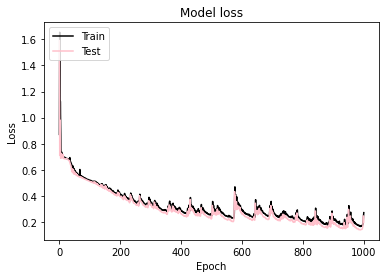

In [29]:
plt.plot(hist.history['loss'], color="black")
plt.plot(hist.history['val_loss'], color="pink")
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [30]:
# hidden_units=100
# learning_rate=0.001
# hidden_layer_act='leaky_relu' # overview, daserialize, elu, exponential, gelu, get, hard_sigmoid, linear, relu, selu, serialize, sigmoid, softmax, softpllus, softsign, swish, tanh 등이 있음
# output_layer_act='sigmoid'
# # no_epochs=10000

# model = Sequential()
# model.add(Dense(64, input_dim=239, activation=hidden_layer_act))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(Dense(128, activation=hidden_layer_act))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(Dense(256, activation=hidden_layer_act))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(Dense(512, activation=hidden_layer_act))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(Dense(1024, activation=hidden_layer_act))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(Dense(2048, activation=hidden_layer_act))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(Dense(1, activation=output_layer_act))

In [31]:
tf.model.evaluate(test)

  62/1108 [>.............................] - ETA: 2s - loss: 0.0000e+00 - accuracy: 0.0000e+00

2022-08-26 17:57:36.187315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1108/1108 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [32]:
predictions = tf.model.predict(test)
predictions

  52/1108 [>.............................] - ETA: 3s

2022-08-26 17:57:38.809967: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1108/1108 [==============================] - 3s 3ms/step


array([[1.1806269e-04],
       [9.6480221e-01],
       [9.9981731e-01],
       ...,
       [8.9426422e-01],
       [2.0319561e-07],
       [1.0000000e+00]], dtype=float32)

In [33]:
rounded = [int(round(x[0])) for x in predictions]
print(rounded)

[0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [34]:
len(rounded)

35452

In [35]:
submission["nerdiness"]=rounded
submission.to_csv('cnn_onehot5.csv',index=False)